In [8]:
!pip install numpy pandas scikit-learn surprise matplotlib


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 1.5 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357221 sha256=0b082c8ec7fe1127af621c3dba63ea3b4955ae24792089790152c5f42236dcad
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [9]:
from surprise import Dataset, Reader
import pandas as pd

# Load the dataset
data = Dataset.load_builtin('ml-100k')

reader = Reader(line_format='user item rating timestamp', sep='\t')
train_data = data.build_full_trainset()

ratings = pd.DataFrame(train_data.all_ratings(), columns=['user', 'item', 'rating'])


Dataset ml-100k could not be found. Do you want to download it? [Y/n] y
Trying to download dataset from https://files.grouplens.org/datasets/movielens/ml-100k.zip...
Done! Dataset ml-100k has been saved to /root/.surprise_data/ml-100k


In [10]:
print(ratings.head())
print(f"Number of unique users: {ratings['user'].nunique()}")
print(f"Number of unique items: {ratings['item'].nunique()}")


   user  item  rating
0     0     0     3.0
1     0   528     4.0
2     0   377     4.0
3     0   522     3.0
4     0   431     5.0
Number of unique users: 943
Number of unique items: 1682


In [11]:
from surprise import SVD, accuracy
from surprise.model_selection import train_test_split

reader = Reader(rating_scale=(1, 5))
data = Dataset.load_builtin('ml-100k')
trainset = data.build_full_trainset()

model = SVD()
model.fit(trainset)

testset = trainset.build_testset()
predictions = model.test(testset)

accuracy.rmse(predictions)


RMSE: 0.6776


0.6775891189236926

In [14]:
def get_top_n(predictions, n=10):
    top_n = {}
    for uid, iid, true_r, est, _ in predictions:
        if not top_n.get(uid):
            top_n[uid] = []
        top_n[uid].append((iid, est))
    for uid, user_ratings in top_n.items():
        user_ratings.sort(key=lambda x: x[1], reverse=True)
        top_n[uid] = user_ratings[:n]
    return top_n

# Get top 10 recommendations for each user
top_n = get_top_n(predictions, n=10)

# Print top recommendations for all users
for user_id, recommendations in top_n.items():
    print(f"Top 10 recommendations for user {user_id}:")
    for iid, est in recommendations:
        print(f"Movie ID: {iid}, Estimated Rating: {est}")
    print("-" * 40)  # Separator between users


Streaming output truncated to the last 5000 lines.
Movie ID: 294, Estimated Rating: 4.137565490965319
Movie ID: 307, Estimated Rating: 4.130237813632673
Movie ID: 310, Estimated Rating: 4.107231470084983
Movie ID: 327, Estimated Rating: 4.102574634490757
Movie ID: 333, Estimated Rating: 4.067945637953047
Movie ID: 300, Estimated Rating: 4.065701704766
Movie ID: 332, Estimated Rating: 4.046615507490403
----------------------------------------
Top 10 recommendations for user 517:
Movie ID: 50, Estimated Rating: 4.586631434056988
Movie ID: 300, Estimated Rating: 4.465511311755189
Movie ID: 258, Estimated Rating: 4.309162577473474
Movie ID: 127, Estimated Rating: 3.9992942080631075
Movie ID: 181, Estimated Rating: 3.990220630805754
Movie ID: 275, Estimated Rating: 3.7396961935921613
Movie ID: 538, Estimated Rating: 3.6392960123745035
Movie ID: 748, Estimated Rating: 3.593123469311522
Movie ID: 1, Estimated Rating: 3.590595389229981
Movie ID: 117, Estimated Rating: 3.5683354717927616
------

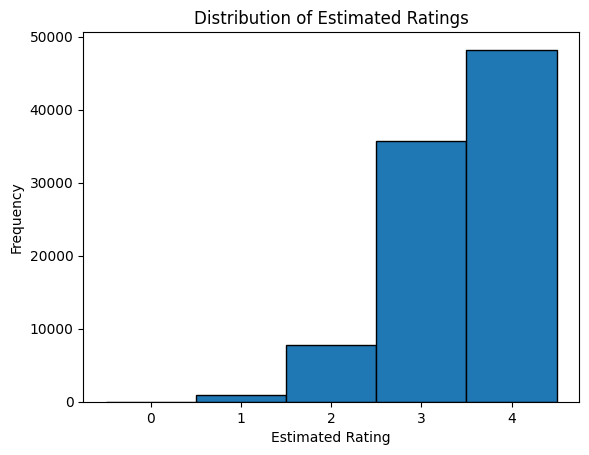

In [15]:
import matplotlib.pyplot as plt

# Example: Plotting the distribution of estimated ratings
import numpy as np

# Extract estimated ratings
estimated_ratings = [est for _, _, _, est, _ in predictions]

plt.hist(estimated_ratings, bins=np.arange(0, 6) - 0.5, edgecolor='black')
plt.title('Distribution of Estimated Ratings')
plt.xlabel('Estimated Rating')
plt.ylabel('Frequency')
plt.show()
